In [2]:
import tensorflow as tf
import hydra
from hydra.utils import instantiate
from hydra import compose, initialize
from omegaconf import OmegaConf, open_dict
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

2024-02-05 11:37:13.141366: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-05 11:37:13.181316: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-05 11:37:13.181874: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Found 2764 files belonging to 2 classes.


2024-02-05 11:37:15.043464: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


1/1 [==============================] - 1s 576ms/step


Text(50.72222222222221, 0.5, 'True')

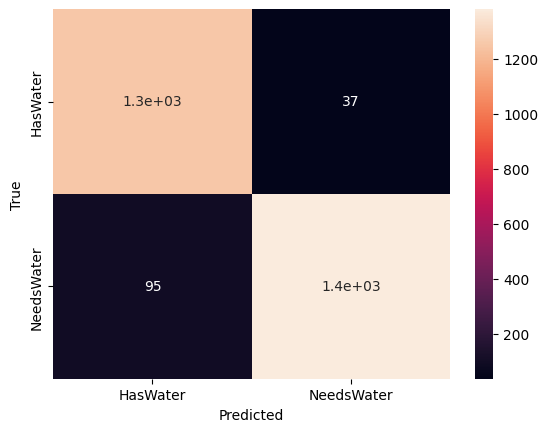

In [3]:
model_path = 'ModelCheckpoints/DogbowlRawCNN_functional/DogbowlRawCNN_functionaltrial425-Epoch15-ValAcc0.95.hdf5'
#model_path  = 'ModelCheckpoints/DogbowlRawCNN_functional/Epoch18-ValAcc0.90.hdf5'

model = tf.keras.models.load_model(model_path)

val_dir = pathlib.Path.cwd().parent / 'Data/Validation'
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    label_mode = 'binary',
    image_size = (258, 258),
    labels = 'inferred'
    #batch_size = 50
    )

#model.evaluate(val_ds, return_dict=True)

y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in val_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

cm = tf.math.confusion_matrix(correct_labels,predicted_labels )
#cm = cm/cm.numpy().sum(axis=1)[:, tf.newaxis]

LABELS = ['HasWater','NeedsWater']
sns.heatmap(
    cm, annot=True,
    xticklabels=LABELS,
    yticklabels=LABELS)
plt.xlabel("Predicted")
plt.ylabel("True")

In [4]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('DogbowlRawCNN_functionaltrial425-Epoch15-ValAcc0.95.tflite', 'wb') as f:
  f.write(tflite_model)


INFO:tensorflow:Assets written to: /tmp/tmp4753kj2a/assets


INFO:tensorflow:Assets written to: /tmp/tmp4753kj2a/assets
2024-02-05 11:37:25.364692: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-02-05 11:37:25.364718: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-02-05 11:37:25.365138: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp4753kj2a
2024-02-05 11:37:25.367761: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-02-05 11:37:25.367773: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /tmp/tmp4753kj2a
2024-02-05 11:37:25.372456: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-02-05 11:37:25.374247: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-02-05 11:37:25.435845: I tensorflow/cc/saved_model/loader.cc:217] Running initializatio